In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
df = sns.load_dataset("titanic")

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.shape

(891, 15)

In [5]:
df['fare'].min()

0.0

In [6]:
df['fare'].max()

512.3292

In [7]:
df['fare'].mean()

32.2042079685746

In [8]:
total = df.isnull().sum().sort_values(ascending=False)
total

deck           688
age            177
embark_town      2
embarked         2
alone            0
alive            0
adult_male       0
who              0
class            0
fare             0
parch            0
sibsp            0
sex              0
pclass           0
survived         0
dtype: int64

In [9]:
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [10]:
df[df['age'].isnull()]['sex'].value_counts()

male      124
female     53
Name: sex, dtype: int64

In [11]:
df[df['deck'].isnull()]['sex'].value_counts()

male      471
female    217
Name: sex, dtype: int64

In [12]:
df[df['embark_town'].notnull()]['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

Text(0, 0.5, 'Fare($)')

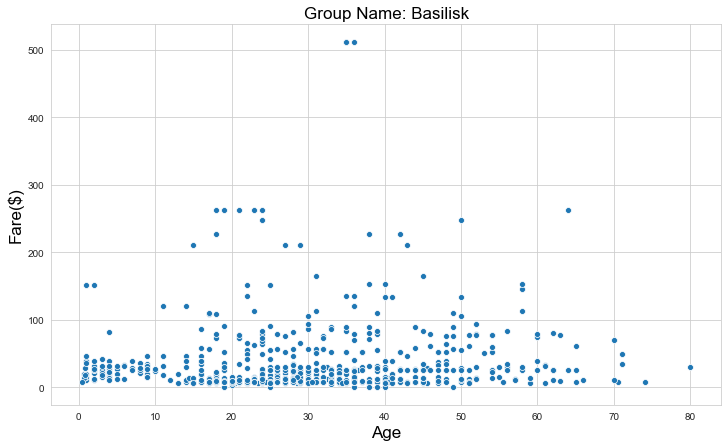

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize = (12,7))
plt.title('Group Name: Basilisk', fontsize = 17, color = 'black')
sns.scatterplot(x=df['age'].dropna(),y=df['fare'].dropna(),data=df)
plt.xlabel('Age', fontsize = 17, color = 'black')
plt.ylabel('Fare($)', fontsize = 17, color = 'black')

Text(0.5, 0, 'Age')

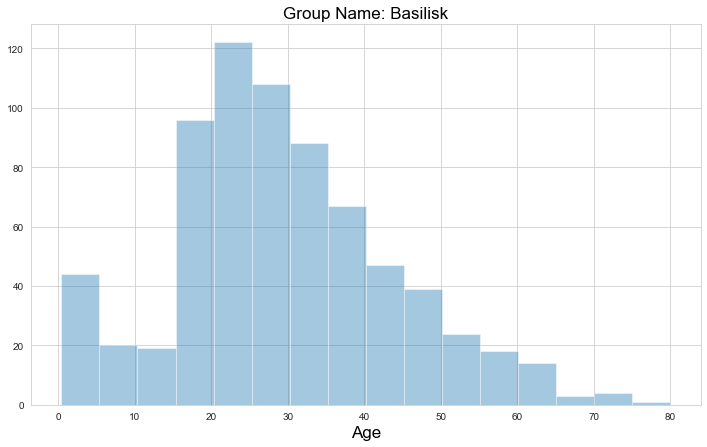

In [14]:
sns.set_style('whitegrid')
plt.figure(figsize = (12,7))
sns.distplot(df['age'].dropna(), kde = False, bins = 16)
plt.title('Group Name: Basilisk', fontsize = 17, color = 'black')
plt.xlabel('Age', fontsize = 17, color = 'black')

In [18]:
# P(A|B)=P(A∩B)/P(B), when P(B)>0.

In [19]:
# P(survived|high fare)=P(survived ∩ high fare)/P(high fare)

In [6]:
median = df['fare'].median()

In [15]:
P_survived_low_fare = df[df['fare'] < median]['survived'].mean()
print(P_survived_low_fare)
P_survived_high_fare = df[df['fare'] > median]['survived'].mean()
print(P_survived_high_fare)

0.25227272727272726
0.5180180180180181


In [16]:
df.groupby('class')['survived'].mean()

class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64

In [25]:
# First create a binary variable that tells whether a passenger is a child
df['ischild'] = df['who']=='child'
# For Bayes theorem we need P(child|survived), P(survived), and P(child)
P_child_survived = df.groupby(['survived'])['ischild'].mean()
P_survived = df['survived'].mean()
P_child = df['ischild'].mean()
print(f'P(child | survived): {P_child_survived[1]}')
print(f'P(survived): {P_survived}')
print(f'P(child): {P_child}')

# Now apply Bayes' theorem
P_survived_child_bayes = (P_child_survived[1] * P_survived) / P_child
print('Probability that a child survived: {:.2f}'.format(P_survived_child_bayes))

P(child | survived): 0.14327485380116958
P(survived): 0.3838383838383838
P(child): 0.0931537598204265
Probability that a child survived: 0.59


In [27]:
# To calculate probabilty that an adult survived, let's first create a column for adult
df['adult'] = (df['who']=='man') | (df['who']=='woman')
P_survived_adult = df.groupby(['adult'])['survived'].mean()
print(P_survived_adult)
print('Probability that an adult survived: {:.2f}'.format(P_survived_adult[1]))

adult
False    0.590361
True     0.362624
Name: survived, dtype: float64
Probability that an adult survived: 0.36


In [56]:
who2 = []
for a,b in zip(df['who'], df['sex']):
    if a == 'man' and b == 'male':
        who2.append('man')
    elif a == 'child' and b == 'male':
        who2.append('boy')
    elif a == 'child' and b == 'female':
        who2.append('girl')
    else:
        who2.append('female')
df['who2'] = who2

In [57]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,ischild,adult,who2
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False,True,man
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False,True,female
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False,True,female
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False,True,female
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,True,man


In [58]:
df['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [59]:
df['who2'].value_counts()

man       537
female    271
girl       43
boy        40
Name: who2, dtype: int64

In [28]:
os.chdir('Downloads')

In [29]:
titanic = pd.read_csv("titanic.csv")

In [30]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [46]:
titanic['Name'][3][:5]

'Mrs. '

In [52]:
def fix_name(x):
    if '(' in x:
        x = x[:5] + x[x.index('(')+1 : x.index(')')]
    return x

In [53]:
titanic['Name'] = titanic['Name'].apply(fix_name)

In [54]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. Florence Briggs Thayer,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Lily May Peel,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
